In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import seaborn as sns
import sklearn

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
games = pd.read_csv("games.csv")

In [17]:
print (games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [18]:
print(games.shape)

(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

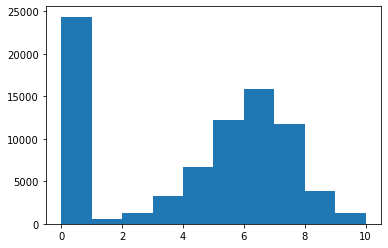

In [19]:
plt.hist(games['average_rating'])

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

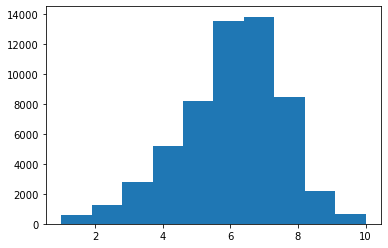

In [20]:
games= games[games['users_rated']!=0]

games= games.dropna(axis=0)

plt.hist(games['average_rating'])

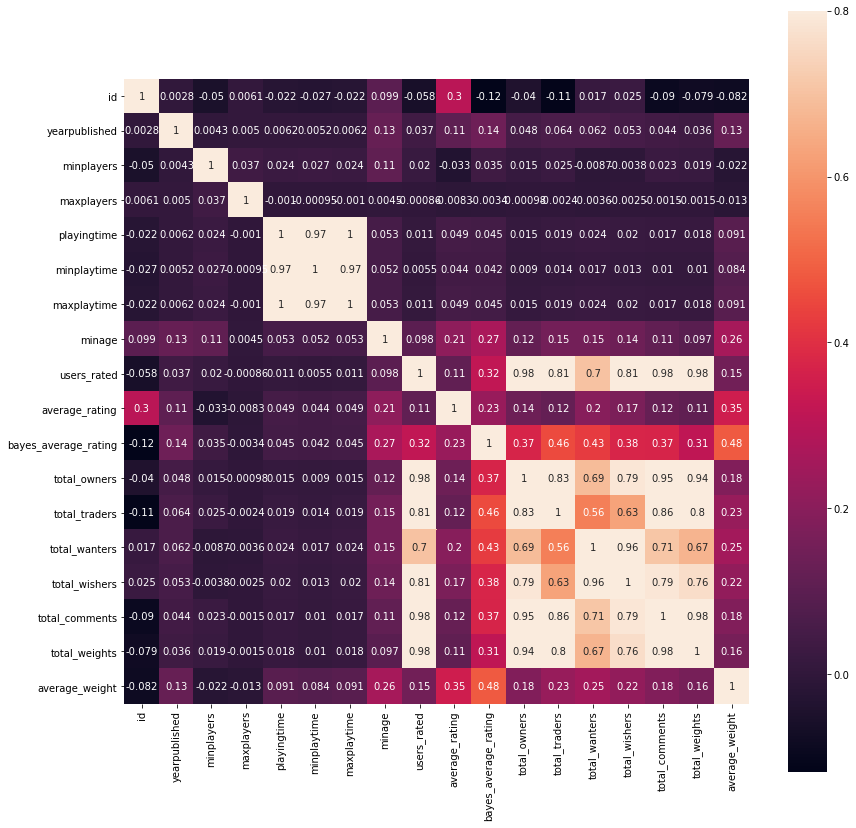

In [23]:
cormat=games.corr()
fig=plt.figure(figsize =(14,14))

sns.heatmap(cormat,vmax=.8,square=True,annot=True)


In [24]:
columns= games.columns.tolist()

In [26]:
columns=[c for c in columns if c not in [ 'bayes_average_rating','average_rating','type','name','id']]

In [32]:
target='average_rating'

In [28]:
from sklearn.model_selection import train_test_split

train =games.sample(frac=.8,random_state=1)
test=games.loc[~games.index.isin(train.index)]

In [29]:
train.shape

(45515, 20)

In [30]:
test.shape

(11379, 20)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

LR=LinearRegression()

LR.fit(train[columns],train[target])



LinearRegression()

In [34]:
predictions=LR.predict(test[columns])

#error

mean_squared_error(predictions,test[target])

2.0788190326293243

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error

RFR = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state =1 )

RFR.fit(train[columns],train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [46]:
predictions= RFR.predict(test[columns])

mean_squared_error(predictions,test[target])

1.4458560046071653

In [47]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [48]:
rating_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

In [49]:
print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [52]:
test[target].iloc[0]

8.07933